## Different Classifier Models: Practicality, Performance and Use Cases
 
**Data** [Sources](../Data/Sources.ipynb) | [Compositional Data](../Data/CompositionalData.ipynb) | [Lambdas](../Data/Lambdas.ipynb) **Classifiers** [Models](../Classifiers/ClassifierModels.ipynb)| [Dimensionality](../Classifiers/Dimensionality.ipynb) | [Performance](../Classifiers/Performance.ipynb) **Visualisation**  [Entropy](../Vis/Entropy.ipynb) | [Manifolds](../Vis/Manifolds.ipynb) **Workflows** [Building Workflows](../BuildingWorkflows.ipynb) **GitHub** [AEGC2019](https://github.com/morganjwilliams/aegc2019) | [pyrolite](https://github.com/morganjwilliams/pyrolite)

This notebook introduces some of the classifier models which have been used previously for geochemical tectonic discrimination, and provides minimal working examples for building a working model. For the purpose of developing classification models for tectonic discrimination using bulk-rock geochemical data, Petrelli et al. (2016) use Support Vector Classifiers ([Petrelli2016]), and Ueki et al. (2018) use Support Vector Classifiers, Random Forests and Sparse Multinomial Regression ([Ueki2018]). 

[Petrelli2016]: https://doi.org/10.1007/s00410-016-1292-2 "Petrelli, M., Perugini, D., 2016. Solving petrological problems through machine learning: the study case of tectonic discrimination using geochemical and isotopic data. Contrib Mineral Petrol 171, 81."
[Ueki2018]: https://doi.org/10.1029/2017GC007401 "Ueki, K., Hino, H., Kuwatani, T., 2018. Geochemical Discrimination and Characteristics of Magmatic Tectonic Settings: A Machine-Learning-Based Approach. Geochemistry, Geophysics, Geosystems 19, 1327–1347."

### Support Vector Classifiers

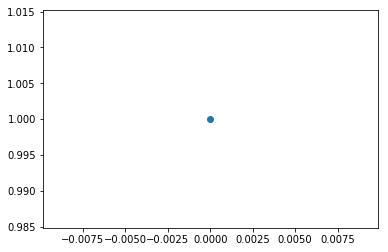

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import timeit
import warnings
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")
plt.scatter(0, 1)

In [10]:
print('out')

out


### Random Forests

In [20]:
import pandas as pd
pd.DataFrame(np.ones(4))

,0
0,1.0
1,1.0
2,1.0
3,1.0


### Multinomial Logistic Regressions

In [3]:
dataset = fetch_20newsgroups_vectorized('all')

In [4]:
X = dataset.data
y = dataset.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 2, 4]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

Dataset 20newsgroup, train_samples=16961, n_features=130107, n_classes=20


In [12]:
t0 = timeit.default_timer()
for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s] Number of epochs: %s' %
              (model_params['name'], this_max_iter))
        lr = LogisticRegression(solver='saga', 
                                multi_class=model,
                                C=1,
                                penalty='l1',
                                fit_intercept=True,
                                max_iter=this_max_iter,   
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

[model=One versus Rest] Number of epochs: 1


C:\ProgramData\Anaconda3_64\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[model=One versus Rest] Number of epochs: 2
[model=One versus Rest] Number of epochs: 4
Test accuracy for model ovr: 0.7963
% non-zero coefficients for model ovr, per class:
 [0.72325086 0.51803516 0.47115067 0.74092862 0.61949011 0.63563067
 0.4165802  0.6256389  0.44117534 0.55877086 0.70173011 0.51188637
 0.71325909 0.55569647 0.38583627 0.67559778 0.48037385 0.41273721
 0.4995888  0.86928451]
Run time (4 epochs) for model ovr:7.59
[model=Multinomial] Number of epochs: 1
[model=Multinomial] Number of epochs: 3
[model=Multinomial] Number of epochs: 7
Test accuracy for model multinomial: 0.7915
% non-zero coefficients for model multinomial, per class:
 [0.45501011 0.26132337 0.15448823 0.29898468 0.32896001 0.22981085
 0.13143028 0.34586917 0.30743926 0.35816674 0.23134804 0.21751328
 0.38276188 0.31205085 0.27054655 0.38814207 0.59873796 0.19983552
 0.18984374 0.36277833]
Run time (7 epochs) for model multinomial:6.76


### Probablistic Classifiers